Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Open the data file for reading

In [2]:
#save file in Pandas DataFrame
rawData = pd.read_csv('PGA Tour Raw Data.csv')
rawData.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


clean the data to eliminate unnecessary columns

In [3]:
#dropping any rows/columns with missing data
null_columns = rawData.isnull().any()

# Print columns with null value
print(null_columns)

Player_initial_last    False
tournament id          False
player id              False
hole_par               False
strokes                False
hole_DKP               False
hole_FDP               False
hole_SDP               False
streak_DKP             False
streak_FDP             False
streak_SDP             False
n_rounds               False
made_cut               False
pos                     True
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
player                 False
Unnamed: 2              True
Unnamed: 3              True
Unnamed: 4              True
tournament name        False
course                 False
date                   False
purse                  False
season                 False
no_cut                 False
Finish                  True
sg_putt                 True
sg_arg                  True
sg_app                  True
sg_ott        

In [4]:
#create a new dataframe with only the columns that are important for analysis
columns_to_drop = ["Player_initial_last", "hole_DKP", "hole_FDP", "hole_SDP", "streak_DKP",
                    "streak_FDP", "streak_SDP", "made_cut", "pos", "finish_DKP", "finish_FDP",
                    "finish_SDP", "total_DKP", "total_FDP", "total_SDP", "Unnamed: 2", "Unnamed: 3",
                    "Unnamed: 4", "purse", "no_cut"]

cleanData = rawData.drop(columns=columns_to_drop)

In [5]:
#Clean up any rows with a "n_rounds" value not equal to 4, to keep data points consistent
cleanData = cleanData[cleanData.n_rounds == 4]

# Clean up any rows with a 'sg_total' value of NA
cleanData = cleanData.dropna(subset=['sg_total'])

#Determine and save the total average strokes for each tournament, and the average score to par
scoreToPar = cleanData['strokes']-cleanData['hole_par']
cleanData['score_to_par'] = scoreToPar

# Print the first 5 rows of the new data
print(cleanData.head())

   tournament id  player id  hole_par  strokes  n_rounds         player  \
0      401353224       9261       288      289         4  Abraham Ancer   
1      401353224       5548       288      286         4    Adam Hadwin   
6      401353224      10906       288      287         4      Aaron Rai   
7      401353224      10372       288      287         4    Adam Schenk   
8      401353224        388       288      299         4     Adam Scott   

                               tournament name  \
0  The Memorial Tournament pres. by Nationwide   
1  The Memorial Tournament pres. by Nationwide   
6  The Memorial Tournament pres. by Nationwide   
7  The Memorial Tournament pres. by Nationwide   
8  The Memorial Tournament pres. by Nationwide   

                                     course    date  season Finish  sg_putt  \
0  Muirfield Village Golf Club - Dublin, OH  6/5/22    2022    T32     0.20   
1  Muirfield Village Golf Club - Dublin, OH  6/5/22    2022    T18     0.36   
6  Muirfiel

Now, we will separate the data by region into separate dataframes.
I have decided to select the top 8 yearly tournaments from each region to analyze.
The regions are Northeast, Southeast, and West (There is not much going on in the northwest, so I combined north and south)

In [6]:
valuesNE = ['3M Open', 'John Deere Classic', 'BMW Championship', 'Rocket Mortgage Classic',
            'RBC Canadian Open', 'Barbasol Championship', 'Travelers Championship']

# Select rows where 'tournament name' is in the specified values
northEastRegion = cleanData[cleanData['tournament name'].isin(valuesNE)]

# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', None)
# pd.set_option('display.max_rows', None)


# # Print the entire DataFrame
# print(northEastRegion)

In [7]:
#Now, do the same for the other regions

#SouthEast
valuesSE = ['The Honda Classic', 'Valspar Championship', 'Arnold Palmer Invitational Pres. by Mastercard', 'RBC Heritage',
            'Masters Tournament', 'Sanderson Farms Championship', 'Tour Championship']
southEastRegion = cleanData[cleanData['tournament name'].isin(valuesSE)]

#West
valuesWest = ['Valero Texas Open', 'Shriners Hospitals for Children Open', 'Waste Management Phoenix Open',
            'AT&T Byron Nelson', 'The American Express', 'Farmers Insurance Open',
            'The Genesis Invitational', 'Charles Schwab Challenge']
westRegion = cleanData[cleanData['tournament name'].isin(valuesWest)]

Now, ensure the data was successfully copied into these new dataframes

In [8]:
# Check which columns have null values
null_columns = northEastRegion.isnull().any()
column_types = northEastRegion.dtypes

# Print columns with null value
print(null_columns)
print(column_types)

tournament id      False
player id          False
hole_par           False
strokes            False
n_rounds           False
player             False
tournament name    False
course             False
date               False
season             False
Finish             False
sg_putt            False
sg_arg             False
sg_app             False
sg_ott             False
sg_t2g             False
sg_total           False
score_to_par       False
dtype: bool
tournament id        int64
player id            int64
hole_par             int64
strokes              int64
n_rounds             int64
player              object
tournament name     object
course              object
date                object
season               int64
Finish              object
sg_putt            float64
sg_arg             float64
sg_app             float64
sg_ott             float64
sg_t2g             float64
sg_total           float64
score_to_par         int64
dtype: object


In [9]:
# Check which columns have null values
null_columns = southEastRegion.isnull().any()
column_types = southEastRegion.dtypes

# Print columns with null value
print(null_columns)
print(column_types)

tournament id      False
player id          False
hole_par           False
strokes            False
n_rounds           False
player             False
tournament name    False
course             False
date               False
season             False
Finish             False
sg_putt            False
sg_arg             False
sg_app             False
sg_ott             False
sg_t2g             False
sg_total           False
score_to_par       False
dtype: bool
tournament id        int64
player id            int64
hole_par             int64
strokes              int64
n_rounds             int64
player              object
tournament name     object
course              object
date                object
season               int64
Finish              object
sg_putt            float64
sg_arg             float64
sg_app             float64
sg_ott             float64
sg_t2g             float64
sg_total           float64
score_to_par         int64
dtype: object


In [10]:
# Check which columns have null values
null_columns = westRegion.isnull().any()
column_types = westRegion.dtypes

# Print columns with null value
print(null_columns)
print(column_types)

tournament id      False
player id          False
hole_par           False
strokes            False
n_rounds           False
player             False
tournament name    False
course             False
date               False
season             False
Finish             False
sg_putt            False
sg_arg             False
sg_app             False
sg_ott             False
sg_t2g             False
sg_total           False
score_to_par       False
dtype: bool
tournament id        int64
player id            int64
hole_par             int64
strokes              int64
n_rounds             int64
player              object
tournament name     object
course              object
date                object
season               int64
Finish              object
sg_putt            float64
sg_arg             float64
sg_app             float64
sg_ott             float64
sg_t2g             float64
sg_total           float64
score_to_par         int64
dtype: object


Now that the data is cleaned and sorted into the different regions, it is time to begin analysing the data 

In [11]:
# Create a dictionary to store each tournament name and the average strokes for that tournament
# Get the unique tournament names
tournament_names = northEastRegion['tournament name'].unique()

# Initialize an empty dictionary to store the averages
strokeAveragesNE = {}

for name in tournament_names:

    selected_rows = northEastRegion[northEastRegion['tournament name'] == name]
    
    # Calculate the mean of 'strokes' for the selected rows
    stroke_mean = np.mean(selected_rows['strokes'])
    
    # Add the tournament name and average to the dictionary
    strokeAveragesNE[name] = stroke_mean

# Print the dictionary
print(strokeAveragesNE)

{'BMW Championship': 279.3667481662592, '3M Open': 274.9389671361502, 'Barbasol Championship': 274.1766666666667, 'John Deere Classic': 273.9139240506329, 'Rocket Mortgage Classic': 277.2258064516129, 'Travelers Championship': 274.2636579572447, 'RBC Canadian Open': 264.9797687861272}


In [12]:
# Now, do the same for the other regions
#SouthEast
tournament_names = southEastRegion['tournament name'].unique()

strokeAveragesSE = {}

for name in tournament_names:

    selected_rows = southEastRegion[southEastRegion['tournament name'] == name]
    
    stroke_mean = np.mean(selected_rows['strokes'])
    
    strokeAveragesSE[name] = stroke_mean

print(strokeAveragesSE)

{'RBC Heritage': 279.35346358792185, 'Masters Tournament': 292.2857142857143, 'Valspar Championship': 282.8678304239402, 'Arnold Palmer Invitational Pres. by Mastercard': 288.3407258064516, 'The Honda Classic': 281.75735294117646, 'Sanderson Farms Championship': 280.49187935034803, 'Tour Championship': 278.13106796116506}


In [13]:
tournament_names = westRegion['tournament name'].unique()

strokeAveragesWE = {}

for name in tournament_names:

    selected_rows = westRegion[westRegion['tournament name'] == name]
    
    stroke_mean = np.mean(selected_rows['strokes'])
    
    strokeAveragesWE[name] = stroke_mean

print(strokeAveragesWE)

{'Charles Schwab Challenge': 278.29285714285714, 'AT&T Byron Nelson': 273.8079331941545, 'Valero Texas Open': 285.4559139784946, 'The Genesis Invitational': 281.2995169082126, 'Waste Management Phoenix Open': 277.76880733944955, 'Farmers Insurance Open': 285.36660929432014, 'The American Express': 276.70142180094786}


In [17]:
#Now, I want to store the average score to par for each tournament in a dictionary
unique_tournaments = np.unique(northEastRegion['tournament name'])

scoreToParNE = {}

for tournament in unique_tournaments:
    
    tournament_data = northEastRegion[northEastRegion['tournament name'] == tournament]['score_to_par']

    average_score_to_par = np.mean(tournament_data)
    
    scoreToParNE[tournament] = average_score_to_par

print(scoreToParNE)

{'3M Open': -9.061032863849766, 'BMW Championship': -5.288508557457213, 'Barbasol Championship': -12.343333333333334, 'John Deere Classic': -10.086075949367089, 'RBC Canadian Open': -7.465317919075145, 'Rocket Mortgage Classic': -10.774193548387096, 'Travelers Championship': -5.736342042755345}


In [18]:
unique_tournaments = np.unique(southEastRegion['tournament name'])

scoreToParSE = {}

for tournament in unique_tournaments:
    
    tournament_data = southEastRegion[southEastRegion['tournament name'] == tournament]['score_to_par']

    average_score_to_par = np.mean(tournament_data)
    
    scoreToParSE[tournament] = average_score_to_par

print(scoreToParSE)

{'Arnold Palmer Invitational Pres. by Mastercard': 0.3407258064516129, 'Masters Tournament': 4.285714285714286, 'RBC Heritage': -4.646536412078153, 'Sanderson Farms Championship': -7.508120649651972, 'The Honda Classic': 1.7573529411764706, 'Tour Championship': -1.8689320388349515, 'Valspar Championship': -1.1321695760598505}


In [19]:
unique_tournaments = np.unique(westRegion['tournament name'])

scoreToParWE = {}

for tournament in unique_tournaments:
    
    tournament_data = westRegion[westRegion['tournament name'] == tournament]['score_to_par']

    average_score_to_par = np.mean(tournament_data)
    
    scoreToParWE[tournament] = average_score_to_par

print(scoreToParWE)

{'AT&T Byron Nelson': -10.559498956158665, 'Charles Schwab Challenge': -1.707142857142857, 'Farmers Insurance Open': -2.2409638554216866, 'The American Express': -11.298578199052132, 'The Genesis Invitational': -2.7004830917874396, 'Valero Texas Open': -2.544086021505376, 'Waste Management Phoenix Open': -6.231192660550459}


In [23]:
#Now, I want to see the results for each year in each region
#NorthEast
unique_years = np.arange(2017, 2022)
unique_tournaments = np.unique(northEastRegion['tournament name'])

# Create a dictionary to store the sg_total averages for each unique tournament name for each year
sg_total_averagesNE = {}

for year in unique_years:
    # Get the data for the current year
    year_data = northEastRegion[northEastRegion['season'] == year]
    
    # Create a dictionary to store the sg_total averages for each unique tournament name for the current year
    sg_total_averages_year = {}
    
    #Now loop through the unique tournaments and save each average shots gained total
    for tournament in unique_tournaments:
        
        tournament_data = year_data[year_data['tournament name'] == tournament]['sg_total']
        
        average_sg_total = np.mean(tournament_data)
        
        sg_total_averages_year[tournament] = average_sg_total
    
        sg_total_averagesNE[year] = sg_total_averages_year

print(sg_total_averagesNE)

{2017: {'3M Open': nan, 'BMW Championship': nan, 'Barbasol Championship': 1.0213559322033898, 'John Deere Classic': 1.0273529411764704, 'RBC Canadian Open': 0.9938235294117649, 'Rocket Mortgage Classic': nan, 'Travelers Championship': 1.0594366197183092}, 2018: {'3M Open': nan, 'BMW Championship': 0.008676470588235202, 'Barbasol Championship': 1.0935849056603775, 'John Deere Classic': 1.0502941176470586, 'RBC Canadian Open': 0.9502777777777778, 'Rocket Mortgage Classic': nan, 'Travelers Championship': 1.0414492753623186}, 2019: {'3M Open': 1.1232876712328768, 'BMW Championship': 0.0024637681159420297, 'Barbasol Championship': 1.0075757575757576, 'John Deere Classic': 1.0955072463768114, 'RBC Canadian Open': 1.0055072463768115, 'Rocket Mortgage Classic': 0.9421126760563382, 'Travelers Championship': 1.0065217391304349}, 2020: {'3M Open': 0.9727941176470587, 'BMW Championship': 0.004782608695652204, 'Barbasol Championship': nan, 'John Deere Classic': nan, 'RBC Canadian Open': nan, 'Rocke

In [24]:
#SouthEast
unique_years = np.arange(2017, 2022)
unique_tournaments = np.unique(southEastRegion['tournament name'])

# Create a dictionary to store the sg_total averages for each unique tournament name for each year
sg_total_averagesSE = {}

for year in unique_years:
    # Get the data for the current year
    year_data = southEastRegion[southEastRegion['season'] == year]
    
    # Create a dictionary to store the sg_total averages for each unique tournament name for the current year
    sg_total_averages_year = {}
    
    #Now loop through the unique tournaments and save each average shots gained total
    for tournament in unique_tournaments:
        
        tournament_data = year_data[year_data['tournament name'] == tournament]['sg_total']
        
        average_sg_total = np.mean(tournament_data)
        
        sg_total_averages_year[tournament] = average_sg_total
    
        sg_total_averagesSE[year] = sg_total_averages_year

print(sg_total_averagesSE)

{2017: {'Arnold Palmer Invitational Pres. by Mastercard': 0.8511594202898553, 'Masters Tournament': nan, 'RBC Heritage': 0.7285714285714288, 'Sanderson Farms Championship': 0.809298245614035, 'The Honda Classic': 0.8500000000000001, 'Tour Championship': -0.00333333333333344, 'Valspar Championship': 0.917910447761194}, 2018: {'Arnold Palmer Invitational Pres. by Mastercard': 0.6446052631578949, 'Masters Tournament': nan, 'RBC Heritage': 0.7618181818181817, 'Sanderson Farms Championship': 0.8266666666666664, 'The Honda Classic': 0.8625675675675676, 'Tour Championship': 0.0033333333333334064, 'Valspar Championship': 0.759342105263158}, 2019: {'Arnold Palmer Invitational Pres. by Mastercard': 0.7878571428571428, 'Masters Tournament': nan, 'RBC Heritage': 0.7807142857142856, 'Sanderson Farms Championship': 0.8551470588235291, 'The Honda Classic': 1.0250000000000001, 'Tour Championship': -0.003333333333333366, 'Valspar Championship': 0.7831884057971011}, 2020: {'Arnold Palmer Invitational Pr

In [25]:
#West
unique_years = np.arange(2017, 2022)
unique_tournaments = np.unique(westRegion['tournament name'])

# Create a dictionary to store the sg_total averages for each unique tournament name for each year
sg_total_averagesWE = {}

for year in unique_years:
    # Get the data for the current year
    year_data = westRegion[westRegion['season'] == year]
    
    # Create a dictionary to store the sg_total averages for each unique tournament name for the current year
    sg_total_averages_year = {}
    
    #Now loop through the unique tournaments and save each average shots gained total
    for tournament in unique_tournaments:
        
        tournament_data = year_data[year_data['tournament name'] == tournament]['sg_total']
        
        average_sg_total = np.mean(tournament_data)
        
        sg_total_averages_year[tournament] = average_sg_total
    
        sg_total_averagesWE[year] = sg_total_averages_year

print(sg_total_averagesWE)

{2017: {'AT&T Byron Nelson': 1.1274626865671644, 'Charles Schwab Challenge': nan, 'Farmers Insurance Open': 0.9507142857142856, 'The American Express': nan, 'The Genesis Invitational': nan, 'Valero Texas Open': 1.0107692307692309, 'Waste Management Phoenix Open': 0.7575000000000001}, 2018: {'AT&T Byron Nelson': 0.8208450704225351, 'Charles Schwab Challenge': nan, 'Farmers Insurance Open': 0.5846052631578948, 'The American Express': nan, 'The Genesis Invitational': nan, 'Valero Texas Open': 1.1525373134328358, 'Waste Management Phoenix Open': 0.8163380281690137}, 2019: {'AT&T Byron Nelson': 1.084647887323944, 'Charles Schwab Challenge': 0.6668055555555557, 'Farmers Insurance Open': 0.6353947368421053, 'The American Express': nan, 'The Genesis Invitational': nan, 'Valero Texas Open': 0.8655072463768116, 'Waste Management Phoenix Open': 0.8798630136986302}, 2020: {'AT&T Byron Nelson': nan, 'Charles Schwab Challenge': 0.9773134328358207, 'Farmers Insurance Open': 0.5640506329113925, 'The A

Now, I want to plot out the results to visually see what has been discovered

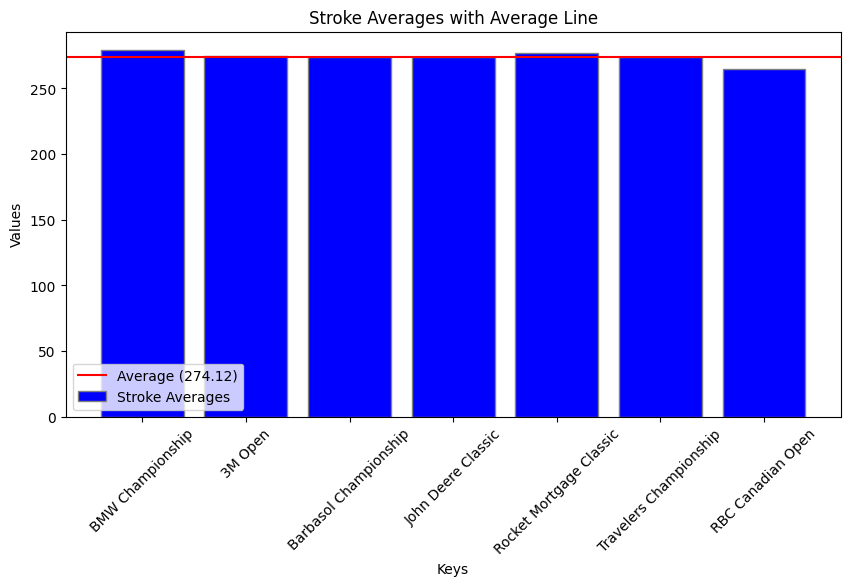

In [35]:
#First, I will plot each region's stroke average in a bar graph

#NorthEast
#create lists for keys and values in dictionary
keys = list(strokeAveragesNE.keys())
values = list(strokeAveragesNE.values())

# Calculate the average
average = np.mean(values)

# Create the bar graph
plt.figure(figsize=(10, 5)) 
plt.bar(keys, values, color='b', edgecolor='grey', label='Stroke Averages')

# Add the average line
plt.axhline(y=average, color='r', linestyle='-', label=f'Average ({average:.2f})')

# Add labels and title
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Stroke Averages with Average Line')

# Rotate the x-axis labels if they overlap
plt.xticks(rotation=45)

# Create legend & Show graphic
plt.legend()
plt.show()

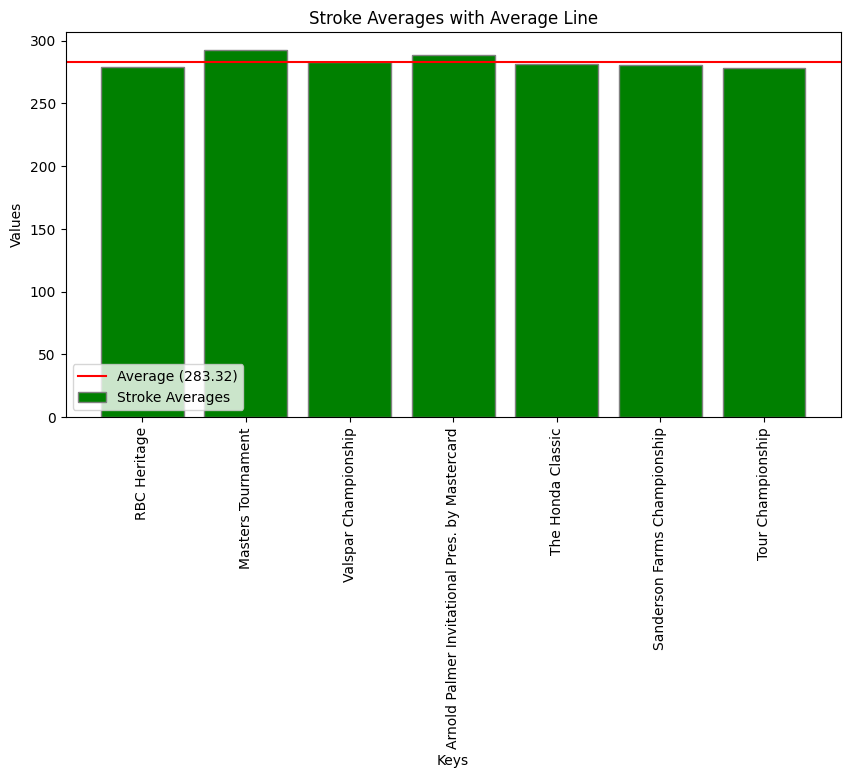

In [38]:
#southEast
keys = list(strokeAveragesSE.keys())
values = list(strokeAveragesSE.values())

average = np.mean(values)

plt.figure(figsize=(10, 5))
plt.bar(keys, values, color='g', edgecolor='grey', label='Stroke Averages')

plt.axhline(y=average, color='r', linestyle='-', label=f'Average ({average:.2f})')

plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Stroke Averages with Average Line')

plt.xticks(rotation=90)

plt.legend()
plt.show()

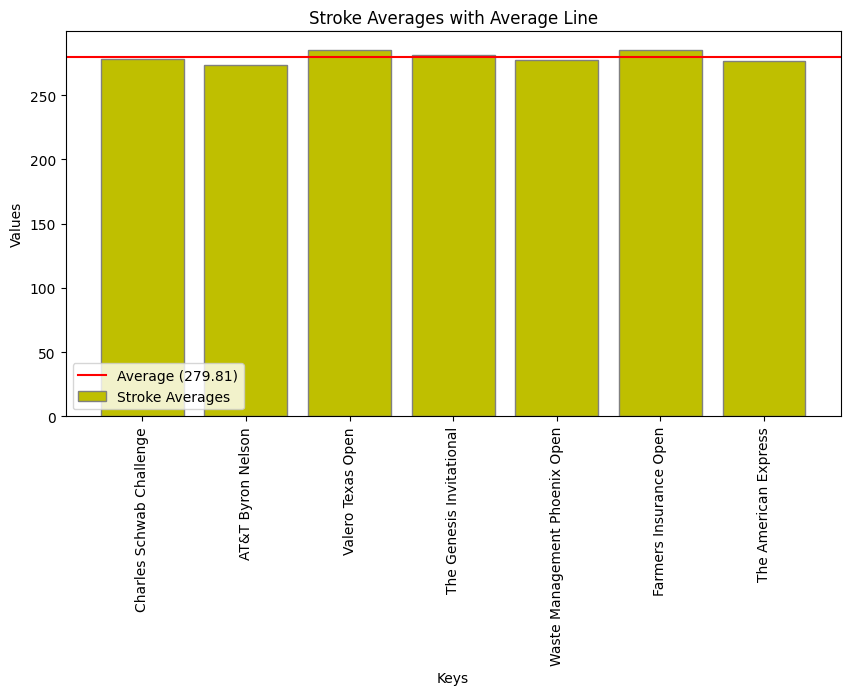

In [39]:
#West
keys = list(strokeAveragesWE.keys())
values = list(strokeAveragesWE.values())

average = np.mean(values)

plt.figure(figsize=(10, 5)) 
plt.bar(keys, values, color='y', edgecolor='grey', label='Stroke Averages')

plt.axhline(y=average, color='r', linestyle='-', label=f'Average ({average:.2f})')

plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Stroke Averages with Average Line')

plt.xticks(rotation=90)

plt.legend()
plt.show()